# DBSCAN Clustering

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Data_Customer_Mall.csv', sep=',')
df.head()

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

Clus_dataSet = df[['Annual_Income','Spending_Score']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.4, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df['Clus_Db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

# A sample of clusters
print(df[['Annual_Income','Spending_Score']].head())

# number of labels
print("number of labels: ", set(labels))

   Annual_Income  Spending_Score
0             15              39
1             15              81
2             16               6
3             16              77
4             17              40
number of labels:  {0, 1, 2, 3, -1}


No handles with labels found to put in legend.


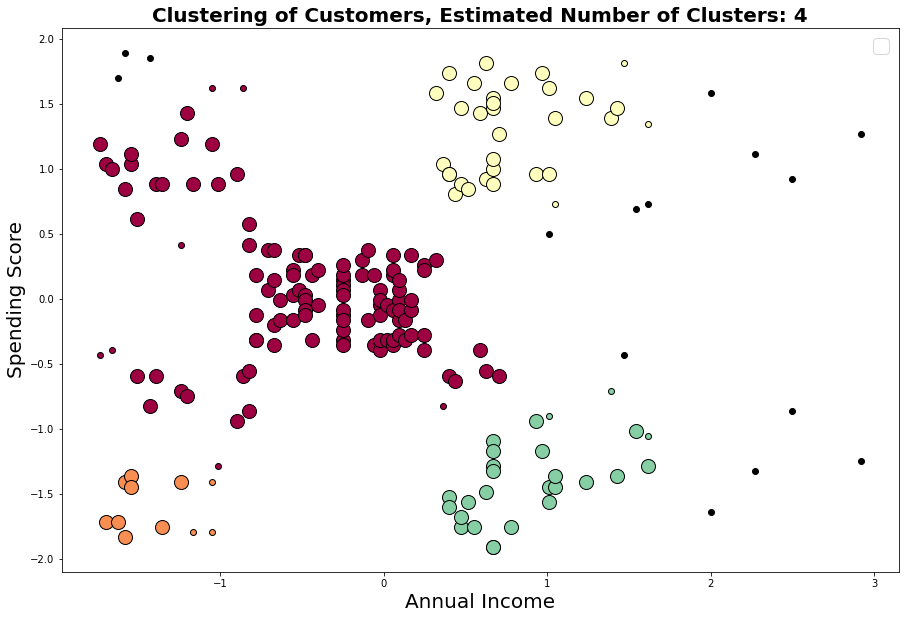

number of noise(s):  15


In [4]:
# Black removed and is used for noise instead.
plt.figure(figsize=(15,10))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Clus_dataSet[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)


plt.title('Clustering of Customers, Estimated Number of Clusters: %d' % realClusterNum, fontweight='bold',fontsize=20)
plt.xlabel('Annual Income',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend(fontsize=20)
plt.show()

n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)

In [5]:
for clust_number in set(labels):
    clust_set = df[df.Clus_Db == clust_number]
    if clust_number != -1:
        print ("Cluster "+str(clust_number)+', Avg Annual Income: '+ str(round(np.mean(clust_set.Annual_Income)))+\
               ', Avg Spending Score: '+ str(round(np.mean(clust_set['Spending_Score'])))+\
               ', Count: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Annual Income: 48, Avg Spending Score: 52, Count: 114
Cluster 1, Avg Annual Income: 24, Avg Spending Score: 9, Count: 11
Cluster 2, Avg Annual Income: 81, Avg Spending Score: 84, Count: 32
Cluster 3, Avg Annual Income: 84, Avg Spending Score: 14, Count: 27
